<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Preparing the data
    </span>
</div>

In [3]:
#1 import os and change the directory to the folder, where the file is located
import os
new_directory=r'C:\Users\vladimir.shpilkin\Desktop\Learning\Python-Projects\Netflix'
os.chdir(new_directory)
print("Current Directory" , os.getcwd())

Current Directory c:\Users\vladimir.shpilkin\Desktop\Learning\Python-Projects\Netflix


In [6]:
#2 import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for visual inspection
import seaborn as sns

In [5]:
#3 create the file path
movie_dict='netflix_data.csv'
movie_data=pd.read_csv(movie_dict)

In [ ]:
#check the count of duplicates
len(movie_data.duplicated())- len(movie_data)

0

In [7]:
#check column data types
movie_data.dtypes


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

In [15]:
# Print the first five rows of the DataFrame
movie_data_top5=movie_data.head(5)
movie_data_top5.index+=1
movie_data_top5

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
2,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
3,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
4,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
5,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Find the average duration per genre and make it downloadable via the csv
    </span>
</div>


In [ ]:
#movie count per genre
movie_count=movie_data['genre'].value_counts()

#average duration per genre
average_duration=movie_data.groupby('genre')['duration'].mean().round(0)

#creating the new dataframe
duration_per_genre = pd.DataFrame({'Movie Count': movie_count, 'Average Duration': average_duration})

#re-assigning the index to every row

duration_per_genre=duration_per_genre.reset_index()
duration_per_genre.index+=1

#renaming the index column to "genre"

duration_per_genre=duration_per_genre.rename(columns={'index':'Genre'})

#sort by the average duration

duration_per_genre = duration_per_genre.sort_values(by='Average Duration', ascending=False)

#exporting to csv
duration_per_genre.to_csv('Movies_Info.csv', sep=',', index=True, encoding='utf-8')

print(duration_per_genre)

                   Genre  Movie Count  Average Duration
1                 Action          721             113.0
7         Classic Movies           77             112.0
13                Dramas         1384             112.0
16  International Movies          114             109.0
24                Sci-Fi           11             108.0
8               Comedies         1074             107.0
10           Cult Movies           12             100.0
19          LGBTQ Movies            1              99.0
15    Independent Movies           20              99.0
14         Horror Movies          244              97.0
34             Thrillers           49              97.0
2         Anime Features           19              93.0
20                 Music           17              91.0
26         Sports Movies            1              87.0
22       Romantic Movies            3              83.0
11         Documentaries          751              82.0
5               Children          502           

In [39]:
movie_data_pivot=pd.pivot_table(movie_data,values=['show_id','duration'],index=['genre'],aggfunc={'show_id':'count','duration': lambda x: round(x.mean(),2)}).sort_values(by='show_id',ascending=False)
movie_data_pivot

,duration,show_id
genre,,
Dramas,111.80,1384
Comedies,107.20,1074
Documentaries,81.88,751
Action,113.28,721
International TV,1.33,690
Children,78.09,502
Crime TV,1.72,369
Kids,1.94,359
Stand-Up,60.60,354


<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Searching for the shortest movies types and depicting them via the bar chart <br>
        <br>and the scatter plot
    </span>
</div>

In [ ]:
#searching for the shortest movie types
movie_data_filtered = movie_data[(movie_data['type'] == 'Movie') 
                                & (movie_data['duration']<60)]

In [ ]:
#count of the most frequent movie types with the length less than 60 minutes
short_movies_overview=movie_data_filtered['genre'].value_counts().sort_values(ascending=False)

In [ ]:
#sorting the values by release year and duration, print first 20 rows
movie_data_filtered_sorted=movie_data_filtered.sort_values(by=['release_year','duration'],ascending=[False,False])
movie_data_filtered_sorted[0:20]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6670,s6671,Movie,The Minimalists: Less Is Now,NaN,NaN,United States,"January 1, 2021",2021,54,They've built a movement out of minimalism. Lo...,Documentaries
7569,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,"January 15, 2021",2021,32,"In this delightful short documentary, an Itali...",Documentaries
1528,s1529,Movie,Creating The Queen's Gambit,NaN,NaN,NaN,"January 8, 2021",2021,14,A fascinating character. Exquisite sets. A wig...,Documentaries
877,s878,Movie,Beyond the Boundary: ICC Women's T20 World Cup...,Anna Stone,NaN,NaN,"August 14, 2020",2020,59,"With highlights from the 2020 tourney, this pr...",Documentaries
4071,s4072,Movie,Michelle Buteau: Welcome to Buteaupia,Page Hurwitz,Michelle Buteau,United States,"September 29, 2020",2020,59,Scene-stealing queen Michelle Buteau dazzles w...,Stand-Up
4467,s4468,Movie,Night on Earth: Shot in the Dark,NaN,Samira Wiley,United Kingdom,"February 1, 2020",2020,59,This look behind the scenes shows how worldwid...,Uncategorized
6702,s6703,Movie,The Netflix Afterparty: The Best Shows of The ...,NaN,"David Spade, London Hughes, Fortune Feimster",United States,"December 13, 2020",2020,59,"David Spade, Fortune Feimster and London Hughe...",Comedies
2664,s2665,Movie,Hazel Brugger: Tropical,NaN,Hazel Brugger,Germany,"December 2, 2020",2020,58,"In this stand-up special, comedian Hazel Brugg...",Stand-Up
3101,s3102,Movie,Jack Whitehall: I'm Only Joking,"Dave Skinner, Freddie Waters",Jack Whitehall,United Kingdom,"July 21, 2020",2020,58,Jack Whitehall hits the stage with hilarious t...,Stand-Up
4176,s4177,Movie,Money Heist: The Phenomenon,"Pablo Lejarreta, Luis Alfaro",NaN,Spain,"April 3, 2020",2020,57,"A documentary on why and how ""Money Heist"" spa...",Documentaries


In [ ]:
#Genres of the top-20 shortest movies
set(movie_data_filtered['genre'][0:20])

{'Children',
 'Comedies',
 'Documentaries',
 'Dramas',
 'Stand-Up',
 'Uncategorized'}

In [ ]:
#Value count of every type
movie_type_count=movie_data_filtered['genre'].value_counts().sort_values(ascending=False)

In [ ]:
movie_type_count

Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: genre, dtype: int64

In [ ]:
#converting to the dictionary
movie_dictionary=movie_type_count.to_dict()

In [ ]:
movie_dictionary

{'Documentaries': 151,
 'Children': 107,
 'Stand-Up': 72,
 'Uncategorized': 40,
 'Comedies': 15,
 'Dramas': 12,
 'Classic Movies': 8,
 'Action': 6,
 'International Movies': 3,
 'Anime Features': 3,
 'Music': 2,
 'Horror Movies': 1}

In [ ]:
color_palette=[]

for keys,values in movie_dictionary.items():
    if keys=='Documentaries':
        color_palette.append('#D9D9D9')
    elif keys=='Children':
        color_palette.append('#C9000F')
    elif keys=='Comedies':
        color_palette.append('#5ED840')
    elif keys=='Dramas':
        color_palette.append('#4C3981')
    elif keys=='Classic Movies':
        color_palette.append('#FBC205')
    elif keys=='Action':
        color_palette.append('#F0F8FF')
    elif keys=='Stand-Up':
        color_palette.append('#8A623C')
    else:
        color_palette.append('#9CB5BA')
        

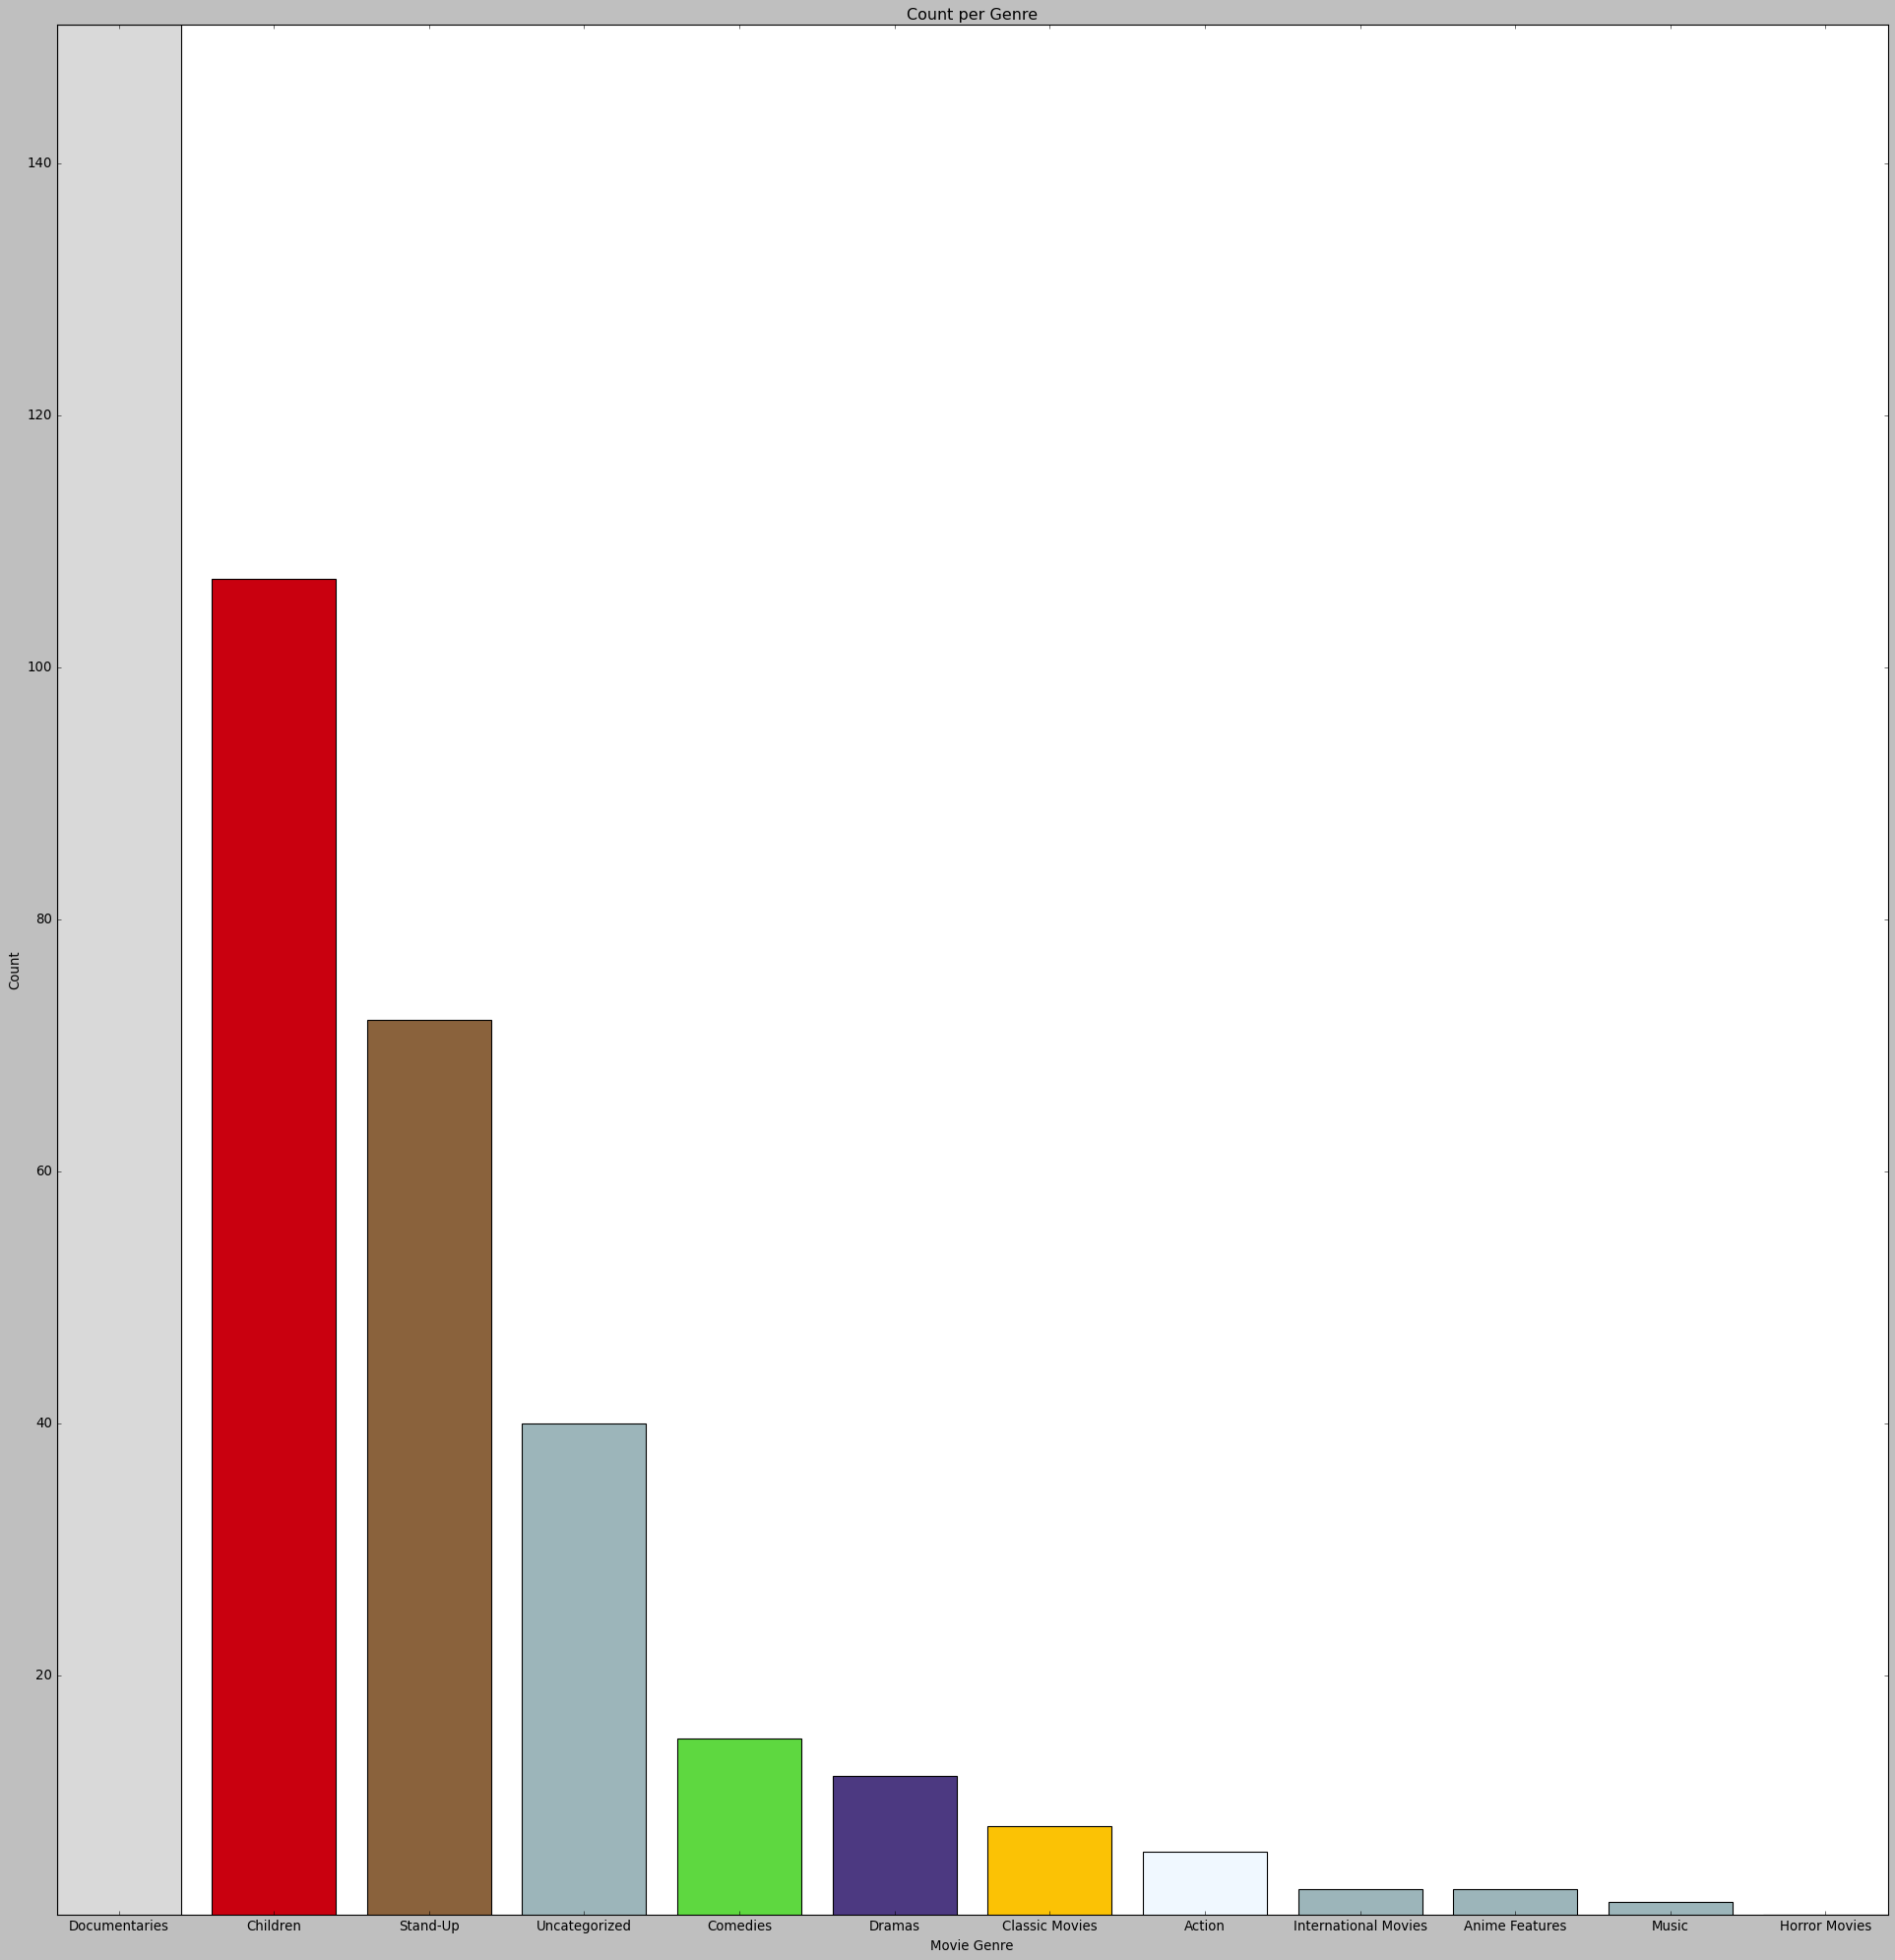

In [ ]:
#create the bar chart to find, which movie type is the most frequently met among the shortest movies, option#1(using the previous calc)
fig = plt.figure(figsize=(30,30))
plt.style.use('classic')


x_values=movie_dictionary.keys()
y_values=movie_dictionary.values()

bar=plt.bar(x_values,y_values,color=color_palette)

plt.ylim(min(y_values),max(y_values))

plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.title('Count per Genre')

plt.show(bar)

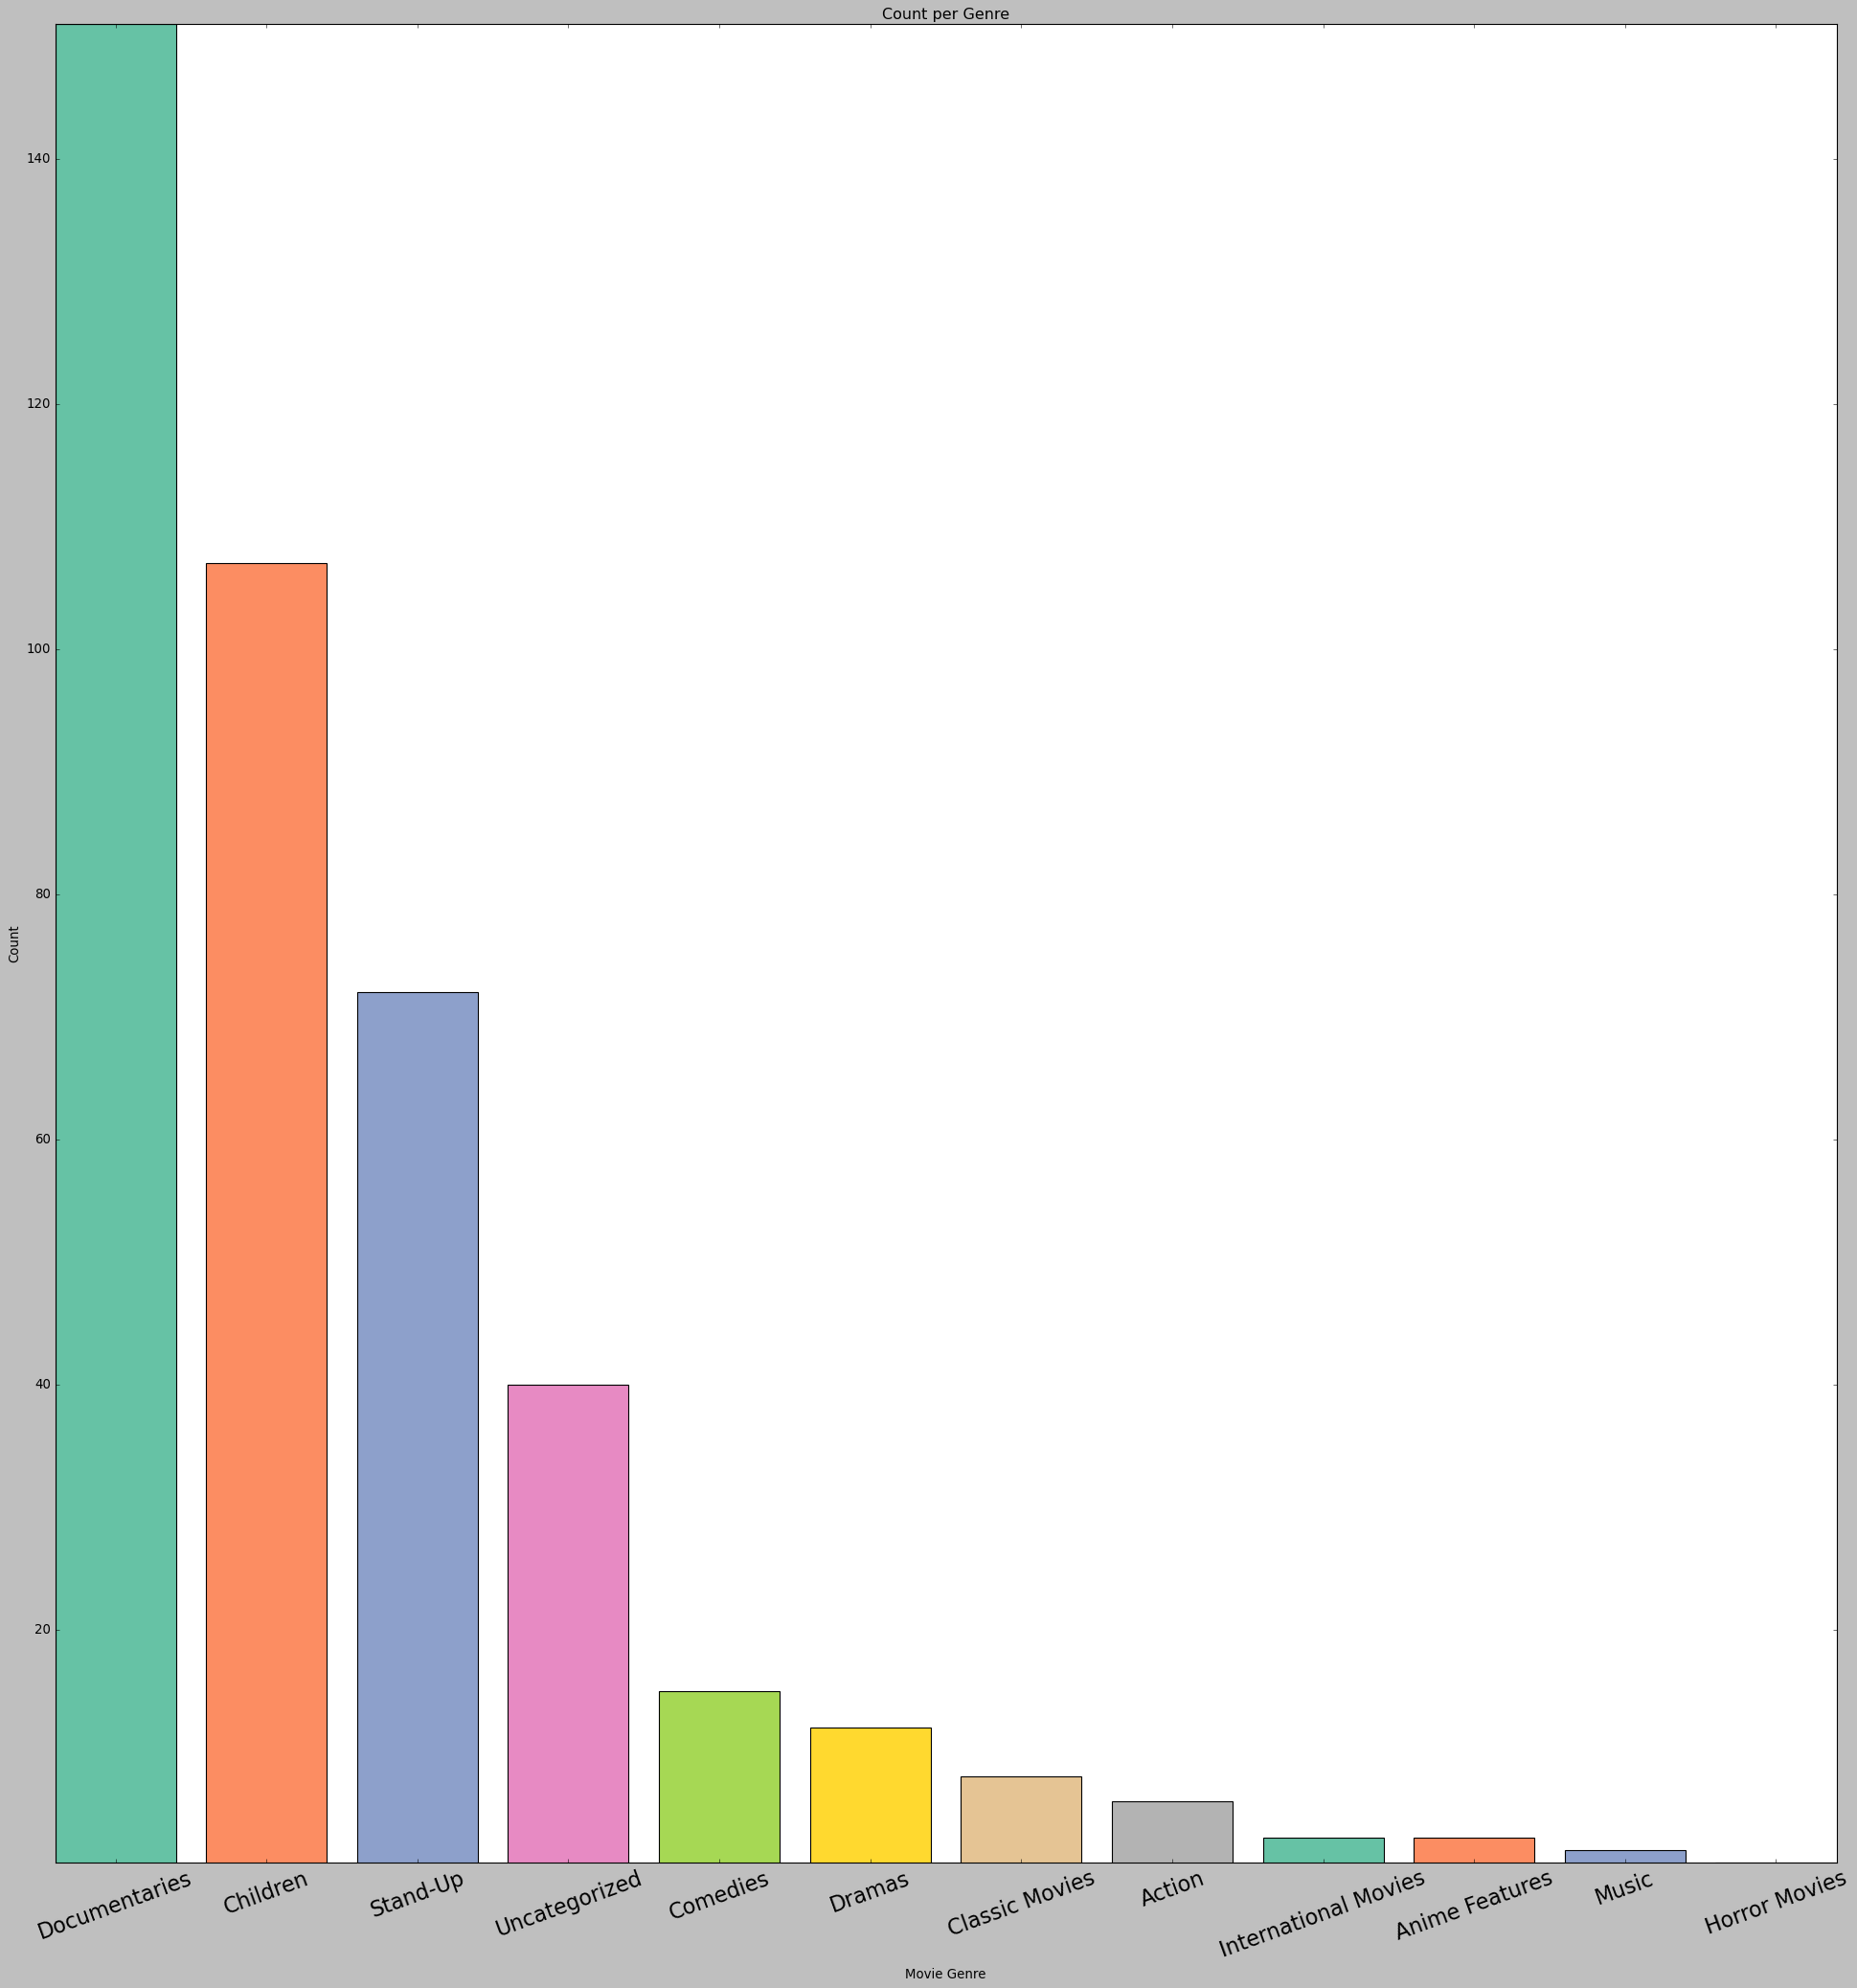

In [ ]:
#building the bar chart, assigning the colors via the seaborn
fig = plt.figure(figsize=(30,30))
plt.style.use('classic')
color_palette_2 = sns.color_palette("Set2", len(x_values))


x_values=movie_dictionary.keys()
y_values=movie_dictionary.values()

bar=plt.bar(x_values,y_values,color=color_palette_2)

plt.ylim(min(y_values),max(y_values))

#name the axis, give the title

plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.title('Count per Genre')


#rotate+increase the font size for better visibility

plt.xticks(rotation=20,fontsize=20)


plt.show(bar)

In [ ]:
# Set the figure style and initalize a new figure
plt.style.use('classic')
fig = plt.figure(figsize=(12,8))

<Figure size 960x640 with 0 Axes>

In [ ]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for x,y in movie_data_filtered_sorted.iterrows():
    if y['genre']=="Children" :
        colors.append("red")
    elif y['genre']=="Documentaries" :
        colors.append("blue")
    elif y['genre']=="Stand-Up" :
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
colors[0:10]

['blue',
 'blue',
 'blue',
 'blue',
 'green',
 'black',
 'black',
 'green',
 'green',
 'blue']

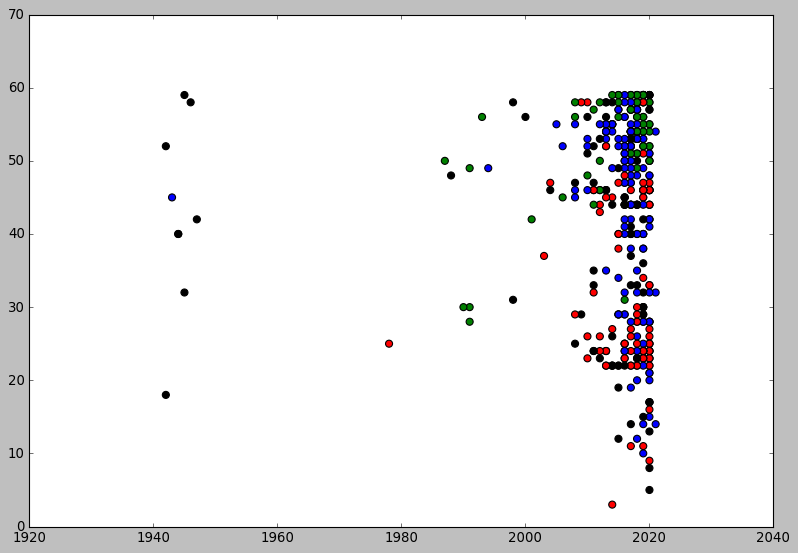

In [ ]:
plt.style.use('classic')
fig = plt.figure(figsize=(12,8))
plt.scatter(movie_data_filtered_sorted['release_year'],movie_data_filtered_sorted['duration'],s=40,c=colors)

In [ ]:
from datetime import datetime

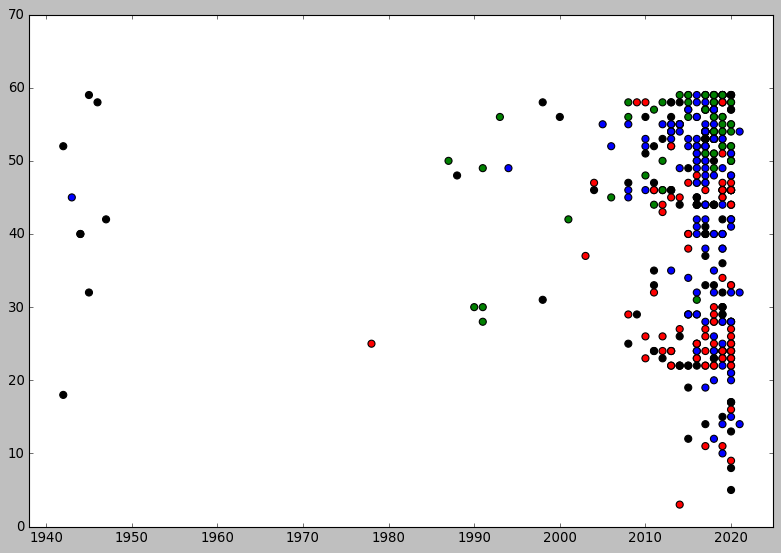

In [ ]:
#buidling more accurate scatter using the datetime module to remove the white spaces on the sides
plt.style.use('classic')
fig = plt.figure(figsize=(12,8))
plt.scatter([datetime(year,1,1) for year in movie_data_filtered_sorted['release_year']],
            movie_data_filtered_sorted['duration'],s=40,c=colors)

 <div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Find the average duration per country and make it downloadable via the csv
    </span>
</div>


In [ ]:
#average duration per country, descending

movies_duration_per_country=movie_data.groupby('country')['duration'].mean().round(0).sort_values(ascending=False)
movies_duration_per_country

country
West Germany    150.0
Soviet Union    147.0
Iran            123.0
Romania         122.0
Somalia         118.0
                ...  
Mauritius         1.0
Cyprus            1.0
Senegal           1.0
Puerto Rico       1.0
Jordan            1.0
Name: duration, Length: 81, dtype: float64

In [ ]:
movies_duration_per_country=movies_duration_per_country.reset_index()
movies_duration_per_country.index+=1

In [ ]:
movies_duration_per_country

,country,duration
1,West Germany,150.0
2,Soviet Union,147.0
3,Iran,123.0
4,Romania,122.0
5,Somalia,118.0
...,...,...
77,Mauritius,1.0
78,Cyprus,1.0
79,Senegal,1.0
80,Puerto Rico,1.0


In [ ]:
#rename the columns
movies_duration_per_country=movies_duration_per_country.rename(columns={'country':'Country','duration':'Duration(in Minutes)'})

In [ ]:
#export to csv
movies_duration_per_country.to_csv("Average Duration per Country.csv",sep=',',index=False,encoding='utf-8')

In [ ]:
#counting the amount of movies per country, renaming the columns
movies_produced=movie_data.groupby('country')['show_id'].size().sort_values(ascending=False).reset_index()
movies_produced.index+=1
movies_produced=movies_produced.rename(columns={'show_id':'Count of Movies','country':'Country'})

In [ ]:
movies_produced

,Country,Count of Movies
1,United States,2883
2,India,956
3,United Kingdom,577
4,Canada,259
5,Japan,237
...,...,...
77,Mauritius,1
78,Guatemala,1
79,Jordan,1
80,Jamaica,1


In [20]:
#convert to pandas dataframe
movies_produced_df=pd.DataFrame(movies_produced.reset_index(drop=True))
movies_duration_per_country_df=pd.DataFrame(movies_duration_per_country)
movies_duration_per_country_df.head(10)

NameError: name 'movies_produced' is not defined

In [ ]:
#create the dataset by merge
movies_count_and_duration_per_country=pd.merge(movies_produced_df,movies_duration_per_country_df,on='Country',how='left',left_index=False,right_index=False)

In [ ]:
#sorting the values
movies_count_and_duration_per_country=movies_count_and_duration_per_country.sort_values(by='Count of Movies',ascending=False)

In [ ]:
#print the dataset
movies_count_and_duration_per_country

,Country,Count of Movies,Duration(in Minutes)
0,United States,2883,67.0
1,India,956,117.0
2,United Kingdom,577,56.0
3,Canada,259,59.0
4,Japan,237,31.0
...,...,...,...
67,Soviet Union,1,147.0
66,Iran,1,123.0
65,West Germany,1,150.0
64,Belarus,1,2.0


In [ ]:
#start indexing from 1
movies_count_and_duration_per_country.index+=1

In [ ]:
#print the dataset
movies_count_and_duration_per_country

,Country,Count of Movies,Duration(in Minutes)
1,United States,2883,67.0
2,India,956,117.0
3,United Kingdom,577,56.0
4,Canada,259,59.0
5,Japan,237,31.0
...,...,...,...
68,Soviet Union,1,147.0
67,Iran,1,123.0
66,West Germany,1,150.0
65,Belarus,1,2.0


In [ ]:
#export to csv
movies_count_and_duration_per_country.to_csv('Movies Count and Duration.csv',index=False,encoding='utf-8')

In [ ]:
movies_count_and_duration_per_country_joined=movies_produced_df.set_index('Country').join(movies_duration_per_country_df.set_index('Country'),how='left')

In [ ]:
#join the dataframes by join method
movies_count_and_duration_per_country_joined=movies_count_and_duration_per_country_joined.reset_index()

In [ ]:
#print the resulted dataset
movies_count_and_duration_per_country_joined

,Country,Count of Movies,Duration(in Minutes)
0,United States,2883,67.0
1,India,956,117.0
2,United Kingdom,577,56.0
3,Canada,259,59.0
4,Japan,237,31.0
...,...,...,...
76,Mauritius,1,1.0
77,Guatemala,1,69.0
78,Jordan,1,1.0
79,Jamaica,1,112.0


In [ ]:
#start indexing from 1
movies_count_and_duration_per_country_joined.index+=1

In [ ]:
movies_count_and_duration_per_country_joined

,Country,Count of Movies,Duration(in Minutes)
1,United States,2883,67.0
2,India,956,117.0
3,United Kingdom,577,56.0
4,Canada,259,59.0
5,Japan,237,31.0
...,...,...,...
77,Mauritius,1,1.0
78,Guatemala,1,69.0
79,Jordan,1,1.0
80,Jamaica,1,112.0


In [ ]:
#export the dataset
movies_count_and_duration_per_country_joined.to_csv("Movie Count and Duration Joined.csv",index=True,encoding='utf-8')

<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
       Checking the most filmed actors
    </span>
</div>


In [ ]:
movie_data

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV


In [ ]:
#splitting the cast into a separate row each
actors=movie_data['cast'].str.split(',').explode()

In [ ]:
from tabulate import tabulate

In [ ]:
actors_movies_overview=pd.DataFrame({"Actors":actors,
                            "Type": movie_data['type'],
                            "Title":movie_data['title'],
                            "Show ID":movie_data['show_id'],
                           "Release Year":movie_data['release_year'],
                           "Country":movie_data['country']})

In [ ]:
actors_movies_countries=actors_movies_overview.groupby(['Actors','Country'])[['Show ID','Title']].count().reset_index()

In [ ]:
actors_movies_countries

,Actors,Country,Show ID,Title
0,Jr.,United States,2,2
1,"""Riley"" Lakdhar Dridi",France,1,1
2,'Najite Dede,Nigeria,1,1
3,2 Chainz,United States,1,1
4,50 Cent,United States,4,4
...,...,...,...,...
37288,İbrahim Büyükak,Turkey,1,1
37289,İbrahim Çelikkol,Turkey,1,1
37290,Şahin Irmak,Turkey,1,1
37291,Şükrü Özyıldız,Turkey,1,1


In [ ]:
actors_pivot=pd.pivot_table(actors_movies_countries,values='Show ID', index=['Actors','Country'])

In [ ]:
actors_pivot=actors_pivot.sort_values(by='Show ID',ascending=False)

In [ ]:
actors_pivot=actors_pivot.reset_index()

In [ ]:
actors_pivot.columns

Index(['Actors', 'Country', 'Show ID'], dtype='object')

In [ ]:
actors_pivot=actors_pivot.rename(columns={'Show ID':'Count of Shows','Country':'Country of Production'})

In [ ]:
actors_pivot.index+=1

In [ ]:
actors_pivot

,Actors,Country of Production,Count of Shows
1,Anupam Kher,India,35
2,Takahiro Sakurai,Japan,27
3,Shah Rukh Khan,India,26
4,Om Puri,India,24
5,Boman Irani,India,23
...,...,...,...
37289,Cameron Schaefer,United States,1
37290,Lennie James,France,1
37291,Lennie Crawford,United States,1
37292,Lennard Kuras,United States,1


In [ ]:
actors_pivot.to_csv('Actors Pivot Table.csv',encoding='utf-8')

<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Checking the films with the largest cast
    </span>
</div>


In [ ]:
#taking the main dataset
movie_data

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV


In [ ]:
#taking two main columns we`ll be working with
cast_size=movie_data[['title','cast']].reset_index(drop=True)

In [ ]:
#making the index start at 1
cast_size.index+=1

In [ ]:
#converting to the df object
cast_size_df=pd.DataFrame({'Title':cast_size['title'],'Cast':cast_size['cast']})

In [ ]:
#Adding the Index column it`s name
cast_size_df=cast_size_df.rename_axis('Index')

In [ ]:
cast_size_df.dtypes

Title    object
Cast     object
dtype: object

In [ ]:
type(cast_size_df)

pandas.core.frame.DataFrame

In [ ]:
for object_type in cast_size_df.columns:
    for element in cast_size_df['Cast']:
        if type(element)==str:
            pass
        else:
            'Not a string!'

In [ ]:
#converting the 'Cast' column to string
cast_size_df['Cast'] = cast_size_df['Cast'].astype(str)
cast_size_df['Cast Size']=cast_size_df['Cast'].str.split(',').apply(len)

In [ ]:
cast_size_sorted=cast_size_df.sort_values(by='Cast Size',ascending=False)

In [ ]:
cast_size_sorted.to_csv('Shows per Cast Size.csv',encoding='utf-8',index=True)

In [ ]:
cast_size_sorted

,Title,Cast,Cast Size
Index,,,
957,Black Mirror,"Jesse Plemons, Cristin Milioti, Jimmi Simpson,...",50
5689,Social Distance,"Danielle Brooks, Oscar Nuñez, Mike Colter, Hea...",50
1472,COMEDIANS of the world,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",47
1533,Creeped Out,"Victoria Diamond, William Romain, Sydney Wade,...",47
2677,Heartbreak High,"Callan Mulvey, Lara Cox, Emma Roche, Ada Nicod...",47
...,...,...,...
3641,Lil Peep: Everybody’s Everything,Lil Peep,1
3645,Limitless,nan,1
770,Battlefish,nan,1
